In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.skew()
# Normally distributed data

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.isnull().sum()
# No null values

YearsExperience    0
Salary             0
dtype: int64

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

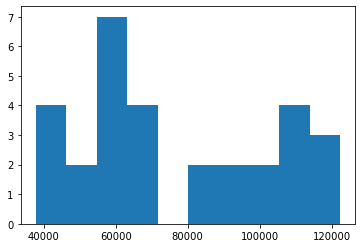

In [7]:
plt.hist(data.Salary)
# "Salary" is normally distributed

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

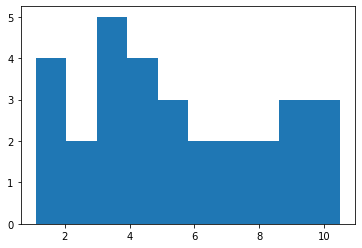

In [8]:
plt.hist(data.YearsExperience)
# "YearsExperience" is normally distributed

{'whiskers': [<matplotlib.lines.Line2D at 0xd7d50de820>,
 'caps': [<matplotlib.lines.Line2D at 0xd7d50deee0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd7d50de4c0>],
 'medians': [<matplotlib.lines.Line2D at 0xd7d50eb5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd7d50eb8e0>],
 'means': []}

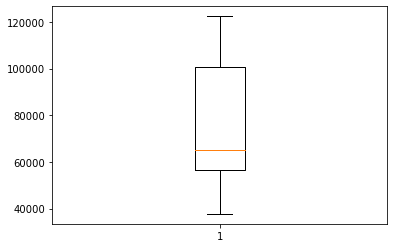

In [9]:
plt.boxplot(data.Salary,vert=1)
# No outliers in "Salary"

{'whiskers': [<matplotlib.lines.Line2D at 0xd7d5138880>,
 'caps': [<matplotlib.lines.Line2D at 0xd7d5138ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd7d5138520>],
 'medians': [<matplotlib.lines.Line2D at 0xd7d51445e0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd7d51448e0>],
 'means': []}

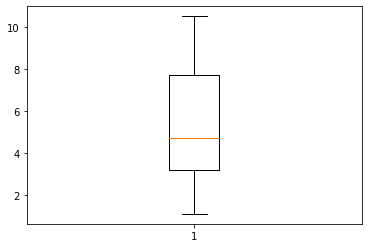

In [10]:
plt.boxplot(data.YearsExperience,vert=1)
# No outliers in "YearsExperience"

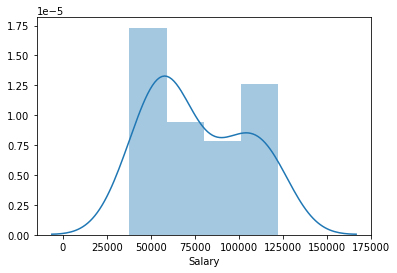

In [11]:
sns.distplot(data.Salary,label='Salary')
# "Salary" is normally distributed

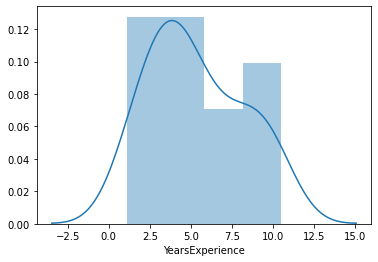

In [12]:
sns.distplot(data.YearsExperience,label='YearsExperience')
# "YearsExperience" is normally distributed

In [13]:
data.corr()
# Strongly Correlated

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


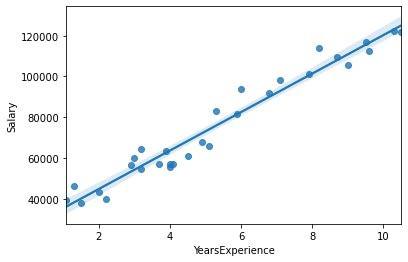

In [14]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()
model.summary()
# Building model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        13:50:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P(YearsExperience)<0.05 thus it is significant variable
P(Model)<0.05 thus it significant model
r squared value=0.957 thus it is strong model

### Test and Train

In [21]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.4)
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2)/data.shape[0])


In [22]:
train_model=smf.ols('Salary~YearsExperience',data = train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Salary
errors=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

1006.445467315055

In [23]:
predtest=train_model.predict(test_data)
actualtest=test_data.Salary
errors=predtest-actualtest
rmse_test=RMSE(predtest,actualtest)
rmse_test

1070.9763862725365